In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# !pip install mlxtend
# !pip install mlxtend

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.frequent_patterns import fpgrowth

# Association rule mining

Sources:

- https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/apriori-algorithm-in-data-mining
- https://www.kaggle.com/code/nandinibagga/apriori-algorithm/notebook
- https://towardsdatascience.com/fp-growth-frequent-pattern-generation-in-data-mining-with-python-implementation-244e561ab1c3
- Dataset: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket

Association rule mining is a technique to identify underlying relations between different items. There are many methods to perform association rule mining. The Apriori algorithm is the most simple and straightforward approach.

## Concepts of Apriori

### Support 
Fraction of transactions that contain an itemset.

The support of item I is defined as the number of transactions containing I divided by the total number of transactions.

support(I) = Number of transactions containing I/Total number of transactions

### Confidence

Measures how often items in Y appear in transactions that contain X. 
Confidence is the likelihood that item Y is also bought if item X is bought. It’s calculated as the number of transactions containing X and Y divided by the number of transactions containing X.

confidence(X->Y) = Number of transactions containing X and Y / Number of transactions containing X

### Frequent Item Set
An itemset whose support is greater than or equal to a minSup threshold

Frequent itemsets or also known as frequent pattern simply means all the itemsets that the support satisfies the minimum support threshold.


### How Does the Apriori Algorithm Work?
The Apriori algorithm operates on a straightforward premise. When the support value of an item set exceeds a certain threshold, it is considered a frequent item set. Take into account the following steps. To begin, set the support criterion, meaning that only those things that have more than the support criterion are considered relevant. 

**Steps for Apriori Algorithm**

The Apriori algorithm has the following steps:

Step 1: Determine the level of transactional database support and establish the minimal degree of assistance and dependability.

Step 2: Take all of the transaction's supports that are greater than the standard or chosen support value. 


Step 3: Look for all rules with greater precision than the cutoff or baseline standard, in these subgroups.

Step 4: It is best to arrange the rules in ascending order of stre

**Advantages of Apriori:**

- Simple Implementation: Apriori algorithm is relatively simple to understand and implement, making it accessible even to those without extensive data mining knowledge.

- Scalability: It can efficiently handle large datasets containing a high number of transactions, making it suitable for real-world applications in various industries.

- Interpretability: The generated association rules are easy to interpret and understand, providing actionable insights for decision-making processes.

- Flexibility: It allows for the customization of parameters such as minimum support and confidence thresholds, enabling users to fine-tune the analysis according to their specific requirements.

- Widely Used: Apriori algorithm is one of the most widely used algorithms for association rule mining, with numerous implementations available in various programming languages and software tools.

**Disadvantages of Apriori:**

- Computationally Intensive: Apriori algorithm may become computationally expensive, especially for large datasets with a high number of items or transactions, due to its need to generate and scan a large number of candidate itemsets.

- Memory Consumption: It requires significant memory to store large candidate itemsets and support counts, which can pose challenges for systems with limited memory resources.

- Handling Sparse Data: In datasets with sparse transactional information, where most itemsets have low support, Apriori may generate a large number of candidate itemsets, leading to increased computational overhead.

- Apriori Property: The Apriori property assumes that if an itemset is frequent, then all of its subsets must also be frequent. This can lead to an exponential increase in the number of candidate itemsets, especially for datasets with a large number of items.

- Insensitive to Data Distribution: Apriori algorithm may not perform well with skewed or imbalanced datasets, as it treats all transactions equally and may not capture subtle patterns or associations in the data.


# Exploratory data analysis

In [4]:
# Load the dataset from a CSV file
df = pd.read_csv("./data/bread basket.csv")

In [5]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


There is no missing value.

In [8]:
# Extract the date from 'date_time' column
df['date'] = pd.to_datetime(df['date_time'], dayfirst=True).dt.date

# Extract the time from 'date_time' column
df['time'] = pd.to_datetime(df['date_time'], dayfirst=True).dt.time

# Extract the month from 'date_time' column and convert numeric month to its name
df['month'] = pd.to_datetime(df['date_time'], dayfirst=True).dt.month_name()

# Map each hour to a specific time range as defined in the 'time_ranges' dictionary
time_ranges = {
    1: '1-2', 2: '1-2', 3: '1-2', 4: '1-2', 5: '1-2', 6: '1-2', 7: '7-8', 8: '8-9', 9: '9-10',
    10: '10-11', 11: '11-12', 12: '12-13', 13: '13-14', 14: '14-15', 15: '15-16', 16: '16-17',
    17: '17-18', 18: '18-19', 19: '19-20', 20: '20-21', 21: '21-22', 22: '22-23', 23: '23-24', 0: '23-24'
}
df['time_range'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour.map(time_ranges)

# Extract the day of the week from 'date_time' column and convert it to its name
df['weekday'] = pd.to_datetime(df['date_time'], dayfirst=True).dt.day_name()

# Drop the 'date_time' column
df.drop('date_time', axis = 1, inplace = True)

In [9]:
df.head(10)

,Transaction,Item,period_day,weekday_weekend,date,time,month,time_range,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
5,3,Cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
6,4,Muffin,morning,weekend,2016-10-30,10:08:00,October,10-11,Sunday
7,5,Coffee,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday
8,5,Pastry,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday
9,5,Bread,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday


In [10]:
# Remove rows with missing values
df.dropna(inplace=True)

In [11]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
# Count the number of unique transactions
df['Transaction'].nunique()

9465

In [13]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,time_range,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
5,3,Cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [14]:
# Clean the 'Item' column by stripping whitespace and converting to lowercase
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [15]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,time_range,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
5,3,cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


# Data Visualization

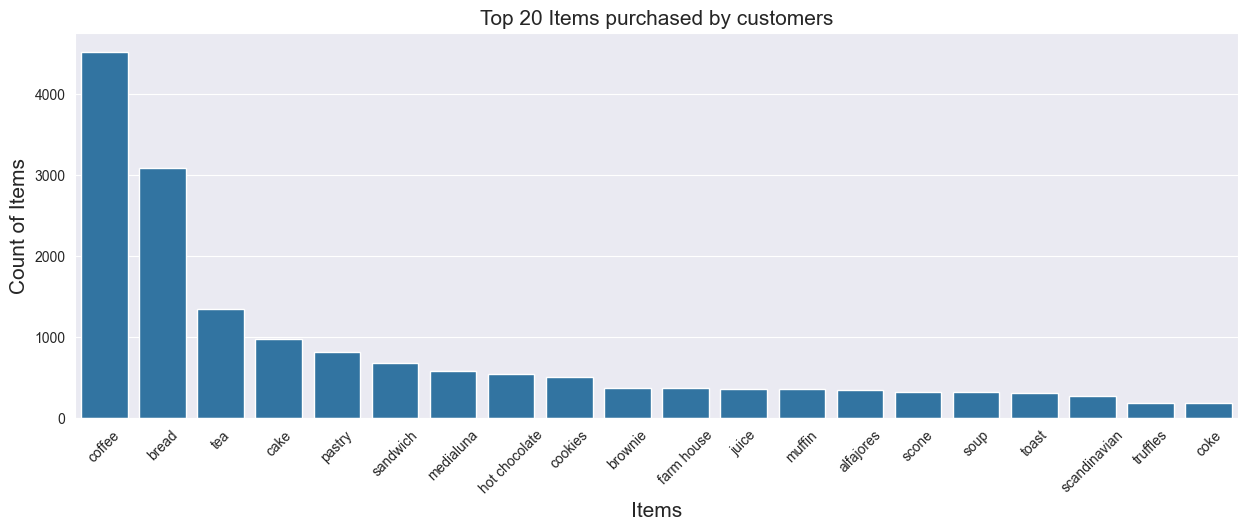

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', size = 15)
plt.show()

Coffee has the highest transactions.

Coke is the 20th most buyed product.

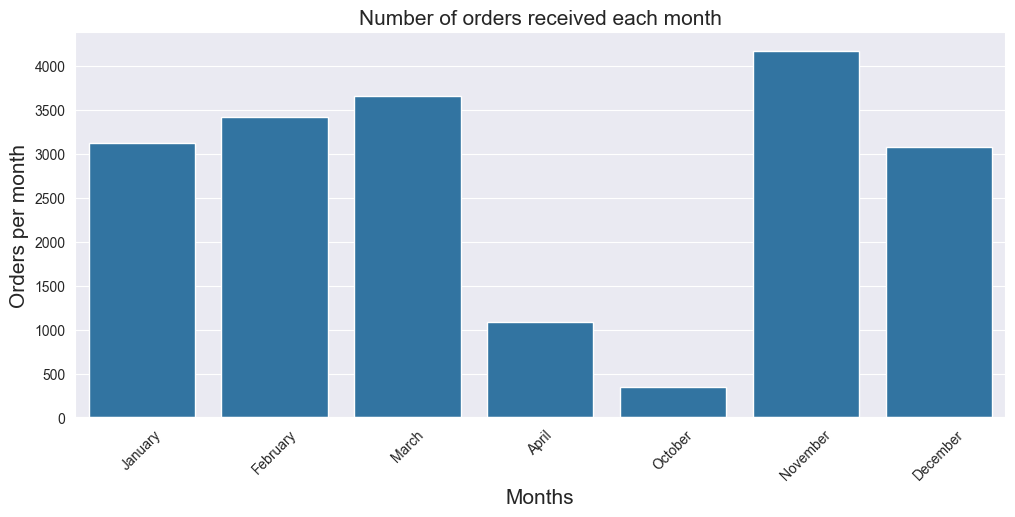

In [17]:
# Group the data by month and count the number of transactions for each month
monthTran = df.groupby('month')['Transaction'].count().reset_index()
# Create a dictionary to map month names to their order
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
               'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Add a new column 'monthorder' to the DataFrame by mapping the 'month' column using the month_order dictionary
# This is done to ensure the months are represented in their chronological order
monthTran['monthorder'] = monthTran['month'].map(month_order)

# Sort the DataFrame based on the 'monthorder' column to ensure the data is in chronological order
monthTran.sort_values("monthorder", inplace=True)

# Create a bar plot to visualize the number of orders received each month
plt.figure(figsize=(12,5))
sns.barplot(data=monthTran, x="month", y="Transaction")
plt.xlabel('Months', size=15)
plt.ylabel('Orders per month', size=15)
plt.title('Number of orders received each month',size=15)
plt.xticks(rotation=45)  
plt.show()

Most transactions were in **November, March, February, January, December**

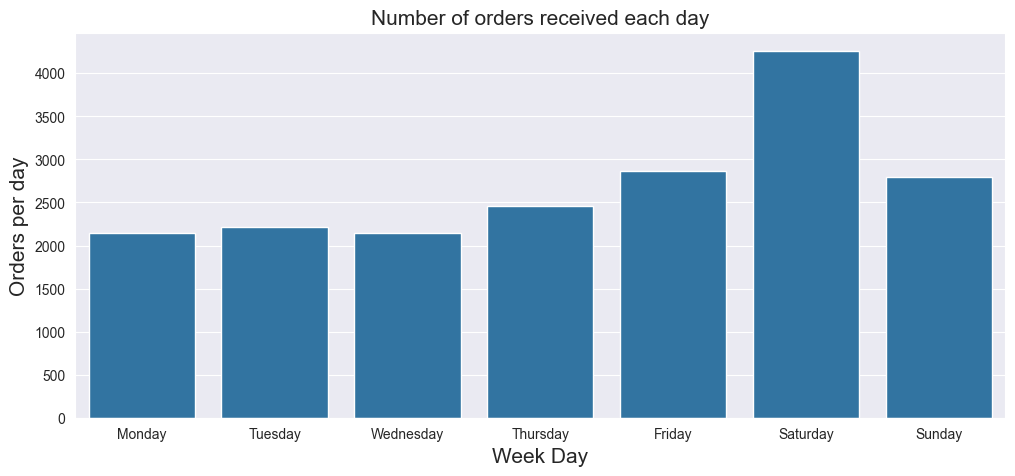

In [18]:
# Group the DataFrame by the 'weekday' column and count the number of transactions for each day of the week
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()

# Sort the DataFrame based on 'weekorder'
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

# Create a bar plot visualizing the number of orders received on each day of the week
plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', size = 15)
plt.show()

People order more on weekends.

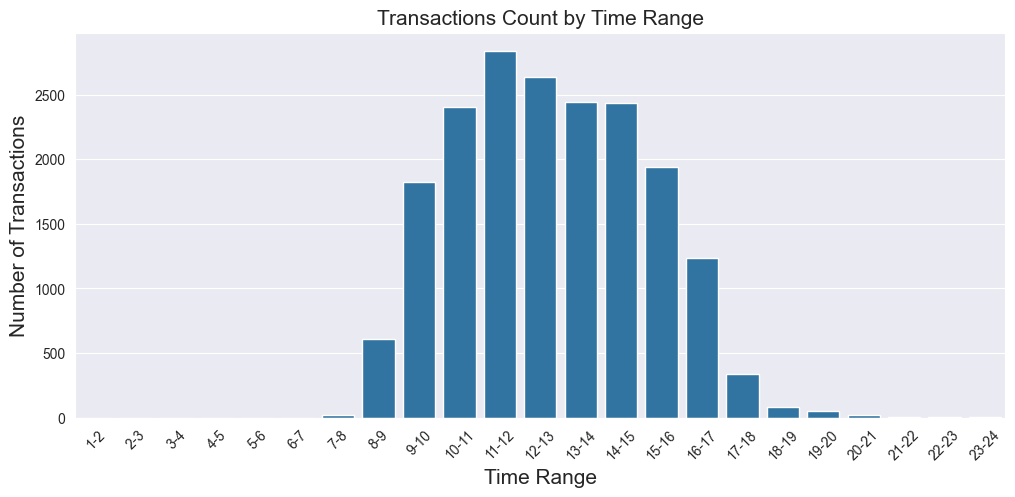

In [19]:
# Define the order for time ranges
time_range_order = ['1-2','2-3','3-4','4-5','5-6','6-7','7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# Set the 'time_range' column as categorical with the specified order
df['time_range'] = pd.Categorical(df['time_range'], categories=time_range_order, ordered=True)

# Regroup the data taking the new order into account
timeRangeTran = df.groupby('time_range', observed=False)['Transaction'].count().reset_index()

# Plotting the data
plt.figure(figsize=(12,5))
sns.barplot(data=timeRangeTran, x="time_range", y="Transaction", order=time_range_order)
plt.xlabel('Time Range', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.title('Transactions Count by Time Range', size=15)
plt.xticks(rotation=45)
plt.show()

People order more during the afternoon, since there are a lot of maximum order percentage between 11-5.

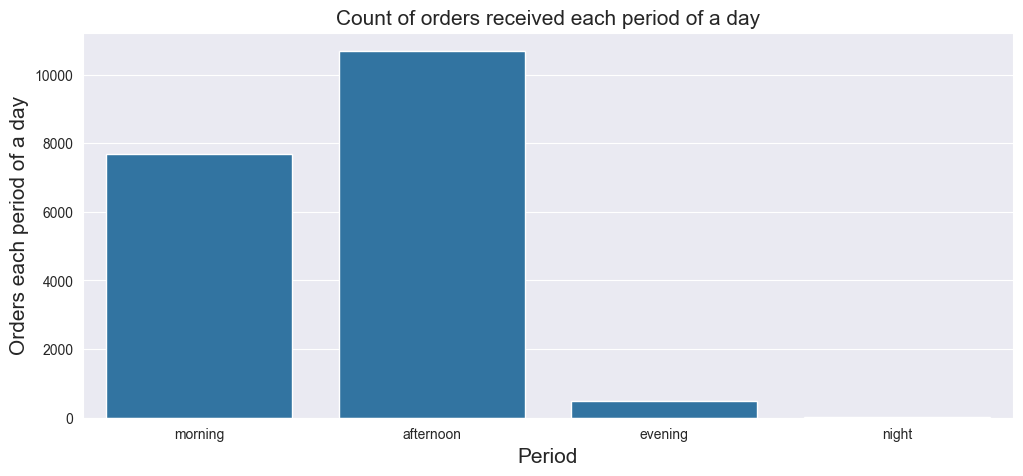

In [20]:
# Set the 'period_day' column as categorical with a specified order
day_order = ['morning', 'afternoon', 'evening', 'night']
df['period_day'] = pd.Categorical(df['period_day'], categories=day_order, ordered=True)

# Group the data by 'period_day' to count the number of transactions in each part of the day
dayTran = df.groupby('period_day', observed=False)['Transaction'].count().reset_index()

# Plotting the data
plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "period_day", y = "Transaction")
plt.ylabel('Orders each period of a day', size = 15)
plt.xlabel('Period', size = 15)
plt.title('Count of orders received each period of a day', size = 15)
plt.show() 

People prefer to order in the morning and afternoon.

In [21]:
# Group the DataFrame by 'date' and count the number of transactions for each date
dates = df.groupby('date')['Transaction'].count().reset_index()

# Filter out dates with fewer than 200 transactions and sort the remaining by date
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

# Merge the filtered 'dates' DataFrame with the 'weekday' information from the original DataFrame
# This is done to add the day of the week to each date that had >= 200 transactions
# The merge is performed on the 'date' column, and 'inner' join ensures that only dates present in both DataFrames are kept
dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')

# Remove any duplicate rows that may have resulted from the merge
# This step ensures that each date is listed only once along with its corresponding weekday
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-11-05,257,Saturday
257,2016-11-12,208,Saturday
465,2017-01-28,224,Saturday
689,2017-02-04,260,Saturday
949,2017-02-18,202,Saturday
1151,2017-03-04,242,Saturday
1393,2017-03-25,232,Saturday


Mostly transactions are on weekends, as we saw earlier in our graph.

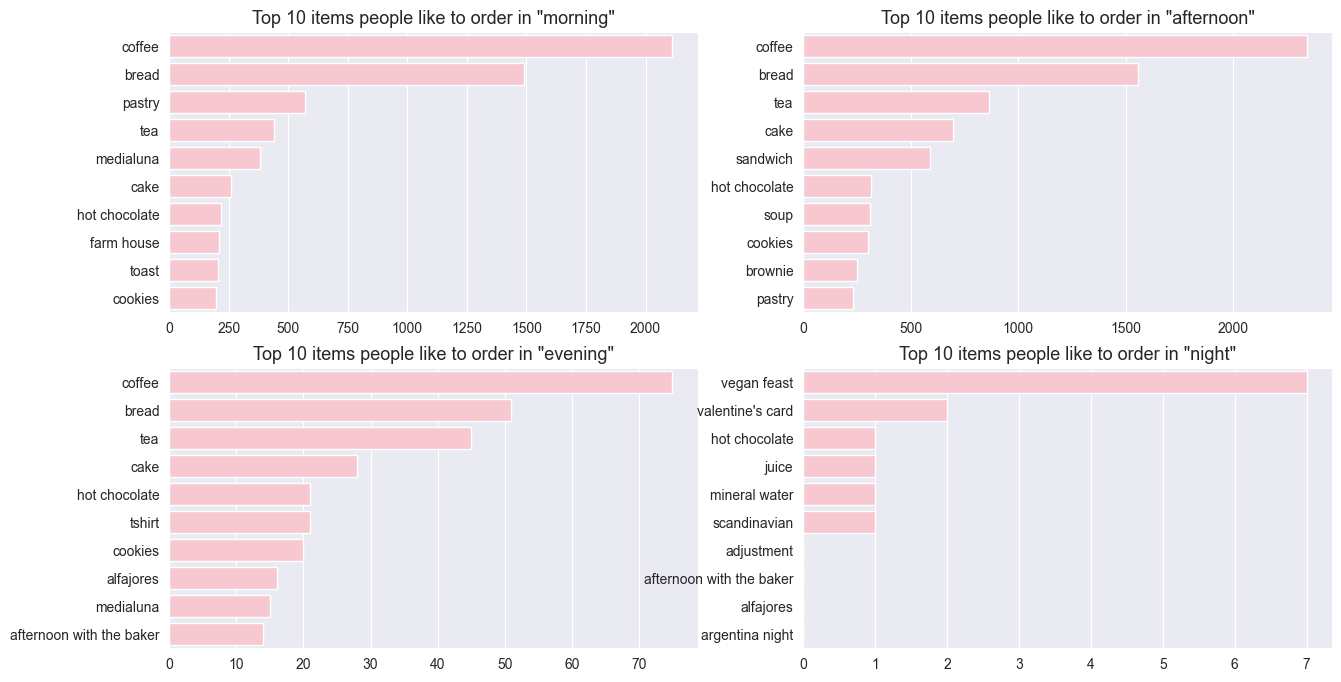

In [22]:
# Group the data by 'period_day' and 'Item' to count the number of transactions for each item in each period of the day
data = df.groupby(['period_day','Item'], observed=False)['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)

# Define the order of periods in a day to iterate over
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

# Apriori Algorithm

In [23]:
# Group the data by 'Transaction' and 'Item' columns, and count the number of occurrences of each item within each transaction
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,1
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [24]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not

# Create a matrix mxn where each row represents a transaction (m=transactions) and each column represents an item (n=items). 
# The values in the matrix indicate whether the item was included in the transaction or not. 
# This is done by pivoting the 'transactions_str' DataFrame, which contains counts of items per transaction.
# The pivot table is indexed by 'Transaction', with columns for each 'Item', and the 'Count' values are aggregated by summing them up. 
# Any missing values (items not present in a transaction) are filled with 0, indicating the item was not part of that transaction.
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Function that returns 0 or 1
def encode(x):
    if x <= 0:
        return 0
    else:
        return 1

# Applying the function to the entire DataFrame
my_basket_sets = my_basket.apply(lambda x: x.apply(encode))

my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in at least 94 transactions out of 9465 transactions only when we consider that item in the frequent itemset
# Convert values in DataFrame from numbers 0 and 1 to boolean values False and True
my_basket_bool = my_basket_sets.apply(lambda x: x > 0)

# Using the apriori algorithm with the transformed DataFrame
frequent_items = apriori(my_basket_bool, min_support=0.01, use_colnames=True)

frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(coffee, cake, bread)"
59,0.011199,"(coffee, pastry, bread)"


In [27]:
# now making the rules from frequent itemset generated above

# Generate association rules from the frequent itemset
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
# Sort the rules by confidence in descending order
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [28]:
# Sorts the DataFrame 'rules' based on the 'confidence' column in descending order
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


Explanations of each metric and an example from our results:

**Antecedent support:** The proportion of transactions that contain the antecedent. It shows how frequently the antecedent occurs independently.

For the antecedent "toast," the support is 0.033597, indicating that toast appears in about 3.36% of all transactions.

**Consequent support:** The proportion of transactions that contain the consequent. It shows how frequently the consequent occurs independently.

For the consequent "coffee," the support is 0.478394, indicating that coffee appears in about 47.84% of all transactions.

**Support:** The proportion of transactions that contain both the antecedent and the consequent. It measures how often the antecedent and the consequent occur together.

For the rule "toast -> coffee," the support is 0.023666, indicating that toast and coffee appear together in about 2.37% of all transactions.

**Confidence:** The likelihood of the consequent being purchased when the antecedent is purchased. It measures the strength of the rule.

For the rule "toast -> coffee," the confidence is 0.704403, indicating that 70.44% of transactions containing toast also contain coffee.

**Lift:** The ratio of the observed support to the expected support if the antecedent and consequent were independent. It indicates the strength of the association between the antecedent and the consequent.

For the rule "toast -> coffee," the lift is 1.472431, indicating that toast is 1.47 times more likely to be bought with coffee compared to its individual purchase probability.

**Leverage:** The difference between the observed frequency of antecedent and consequent appearing together in transactions and the frequency that would be expected if they were independent. It measures how much more often the antecedent and consequent appear together than would be expected if they were independent.

For the rule "toast -> coffee," the leverage is 0.007593, indicating that the occurrence of toast and coffee together is 0.75% higher than would be expected if they were independent.

**Conviction:** All previous metrics (confidence, lift, leverage) indicate a strong association between toast and coffee, implying that they are often purchased together. However, conviction works differently.

Conviction is a measure that assesses how dependent consequents are on antecedents, considering their support. It focuses on how often the consequent, toast) is purchased without the antecedent (coffee), compared to the expected frequency of purchasing toast without coffee assuming they are independent.

Thus, a high value of conviction (greater than 1) indicates that the association between the antecedent and consequent is not as strong as expected and that the consequents (toast) are more often purchased without the antecedent (coffee) than with it.

In our case, the value of conviction is 1.764582, which means that customers are 1.76 times more likely to buy toast without coffee than with coffee. This may be due to the fact that toast may be purchased at a different time of day or in a different context, regardless of coffee.

**Zhang's metric:** A measure that considers both confidence and leverage, providing a comprehensive evaluation of the rule's signific
ance.
For the rule "toast -> coffee," Zhang's metric is 0.332006, indicating a level of significance considering both confidence and leverage.

# FP-Growth algorithm 

The FP-Growth algorithm is a game-changer because it gets rid of the need to guess and check possible item combinations, a major step forward from the Apriori method. 

With FP-Growth, we don't run into issues when dealing with large sets of items. It stores all the data in a much more streamlined way. Plus, we don't have to keep going through our database multiple times to find what we're looking for. By using a special structure called the FP tree, we can find the patterns we need more quickly and efficiently.

What's an FP Tree?
At the heart of the FP-Growth method is something called the FP tree. Think of it as a smart, compressed way to keep track of all the items you're interested in. It's not just a simple list, though. This tree structure is pretty clever – it remembers how different items are related to each other.

Building this tree involves taking each group of items you have and making a unique path for it in the tree, one group at a time. The cool part is that the items you see more often are more likely to end up sharing paths.

To find the patterns we're after, we go through the FP tree in a step-by-step way, seeing which items often end up together. The process of finding these patterns, aptly named "pattern growth," involves looking at these common paths and putting the pieces together to see the bigger picture of how items are connected.

**FP Growth Algorithm steps**

The FP Growth algorithm stands out because it uses a smart divide-and-conquer strategy, incorporating advanced data structures like trees and linked lists, along with a technique known as depth-first search. This process is broken down into two main stages, with each stage comprising two steps.

Stage 1: Building the FP Tree

Step 1: Clean and Sort: In this initial step, items not meeting a minimum frequency threshold are removed from each transaction. The remaining items are then organized in descending order based on their frequency of occurrence.

Step 2: Tree and Header Table Construction: The next step involves looping through these filtered and sorted itemsets, adding them to the tree one by one. If an item is already part of a branch, it shares that node, and its count is increased. New items are added to new branches. Simultaneously, a header table is created. This table includes a linked list for each unique item, allowing quick access to any item's occurrences in the tree without having to search through the entire structure.

Stage 2: Mining the FP Tree for Patterns

Step 1: Create Conditional FP Trees: Starting with each item that occurs frequently, a base for conditional patterns is formed using sets of prefixes in the tree. These bases are then used to build conditional FP trees in a manner similar to the first stage.

Step 2: Recursive Mining of Conditional Trees: Finally, these conditional FP trees are mined to uncover frequent patterns. A separate conditional FP tree is built for each pattern, employing a recursive function akin to depth-first search. This ensures all potential trees are fully explored for patterns using the remaining items before the process concludes.

In [29]:
# 'min_support=0.01' sets the minimum support threshold for itemsets to be considered frequent. 
# This means itemsets appearing in at least 1% of all transactions will be identified.
# 'use_colnames=True' indicates that the function should use the actual item names rather than column indices.
frequent_items_fp = fpgrowth(my_basket_bool, min_support=0.01, use_colnames=True)

# Generate association rules from the identified frequent itemsets.
# The 'metric' parameter is set to "lift" to use the lift metric for filtering rules. 
# Lift compares the observed support of the entire rule to the support expected if the antecedent and consequent were independent.
# 'min_threshold=1' means only rules with a lift value of 1 or more are considered, suggesting at least a
# neutral (if not positive) association between antecedent and consequent.
rules_fp = association_rules(frequent_items_fp, metric="lift", min_threshold=1)

# Sort the generated rules by the 'confidence' metric in descending order. Confidence indicates the probability
# of seeing the consequent in transactions under the condition that these transactions also contain the antecedent.
# This sorting makes it easier to identify the strongest rules first.
rules_fp.sort_values('confidence', ascending=False, inplace=True)
rules_fp


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
40,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
14,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
8,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
33,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
31,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
19,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
39,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
5,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


We got the same results for the Apriori algorithm and for FP-Growth. The key differences between these algorithms lie not in the accuracy or the final output but in their efficiency, scalability, and memory usage.

### Efficiency and Scalability

**Apriori** algorithm works by iteratively exploring the itemset space, starting from the smallest itemsets and expanding them one item at a time. At each step, it prunes the itemsets that don't meet the minimum support threshold. This process involves repeatedly scanning the dataset to calculate the support of itemsets, making it slower and less scalable, especially with a large number of items or transactions.

**FP-Growth**, on the other hand, compresses the dataset into a compact structure called the FP-tree, which encapsulates the essential transaction information. It then recursively divides the problem into smaller subproblems, each corresponding to a conditional FP-tree. This method significantly reduces the number of database scans to just two, making FP-Growth faster and more scalable than Apriori, especially as the size of the data grows.

### Memory Usage

**Apriori** generally requires less memory than FP-Growth because it does not need to store the entire dataset in memory. It operates on the dataset in a sequential manner, which, while slower, can be more memory-efficient for smaller datasets or when the number of frequent itemsets is limited.

**FP-Growth** requires more memory upfront to store the FP-tree, but this investment in memory is offset by the reduction in the number of passes over the dataset and the ability to efficiently mine frequent itemsets. The memory usage might be a concern with very large datasets, but the efficiency and speed benefits often outweigh this drawback.
